In [1]:
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt

# Exercise 1.6

## a)

In [3]:
num_features = 3 
num_obj = 10
x = np.random.rand(num_obj, num_features)
x

array([[8.40858850e-01, 4.82055409e-01, 2.89503489e-01],
       [9.69396423e-02, 7.67488029e-01, 7.82525035e-01],
       [8.39698495e-01, 8.61357893e-01, 8.08168609e-02],
       [7.11354410e-01, 7.34581195e-01, 9.65200104e-01],
       [7.68416506e-01, 4.07511220e-01, 8.90994650e-01],
       [4.33846870e-01, 3.74890274e-01, 7.41160621e-01],
       [9.39283165e-05, 5.70762139e-01, 8.48282409e-01],
       [4.09869159e-01, 9.32682003e-01, 3.60159899e-01],
       [7.60422558e-02, 3.18635922e-01, 4.07419184e-01],
       [5.24837892e-01, 1.86271875e-01, 7.31191055e-01]])

## b)

In [3]:
np.mean(x, axis=0)

array([0.42266175, 0.40283974, 0.49943585])

In [4]:
np.std(x, axis=0)

array([0.27779088, 0.26438083, 0.31504633])

In [5]:
np.mean(x, axis=0)

array([0.42266175, 0.40283974, 0.49943585])

In [6]:
np.std(x, axis=0)

array([0.27779088, 0.26438083, 0.31504633])

In [7]:
np.mean(x, axis=1)

array([0.16209353, 0.61210596, 0.55290824, 0.46598519, 0.41358706,
       0.34396821, 0.28977055, 0.47931181, 0.50630656, 0.59042069])

In [8]:
np.std(x, axis=1)

array([0.07466426, 0.34762781, 0.32874105, 0.26463367, 0.22081498,
       0.19351918, 0.1029667 , 0.27879962, 0.3968631 , 0.1433502 ])

There is no difference betweeen mean(x), and axis = 0 since mean(x) is the same as putting axis=0 (is the default value). The difference between axis=0 and axis=1 is the direction in which the mean is computes into the array. Axis=0 is mean over objects of 1 feature, and axis=1 over features of one object.

# Exercise 1.7

## a)

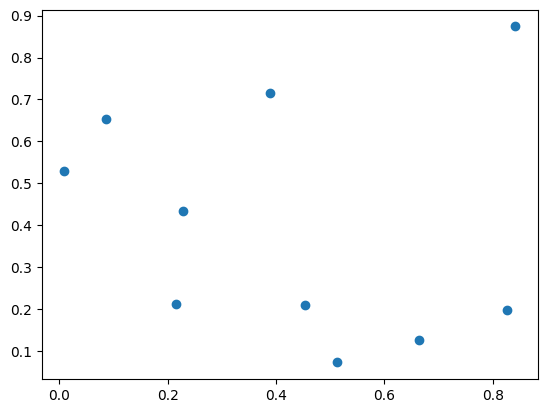

In [9]:
plt.scatter(x[:,0],x[:,1])

## b)

I can't identify since i did it with a random function of numpy sampled from a uniform distribution.

# Exercise 1.8

## a)

In [10]:
x

array([[0.21626483, 0.21350139, 0.05651438],
       [0.84144359, 0.87402822, 0.12084609],
       [0.452909  , 0.209708  , 0.99610772],
       [0.82650341, 0.19874087, 0.3727113 ],
       [0.66419701, 0.12692882, 0.44963535],
       [0.51252677, 0.07296583, 0.44641202],
       [0.22816852, 0.43483926, 0.20630388],
       [0.08583401, 0.65425034, 0.69785107],
       [0.00925834, 0.52909236, 0.98056898],
       [0.38951206, 0.71434227, 0.66740774]])

In [12]:
lab = np.array([1,1,1,1,2,2,2,2,2,2]).reshape(10,1)
lab = np.array([[1,1,1,1,2,2,2,2,2,2]]).T # alternative
a = pr.prdataset(x, lab)
a

10 by 3 prdataset with 2 classes: [4 6]

# Exercise 1.9

## a)

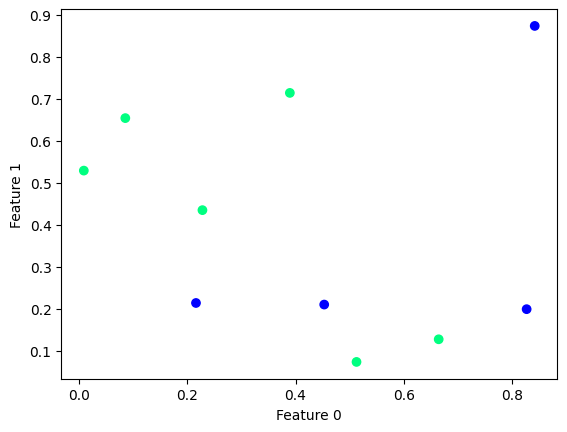

In [13]:
pr.scatterd(a)

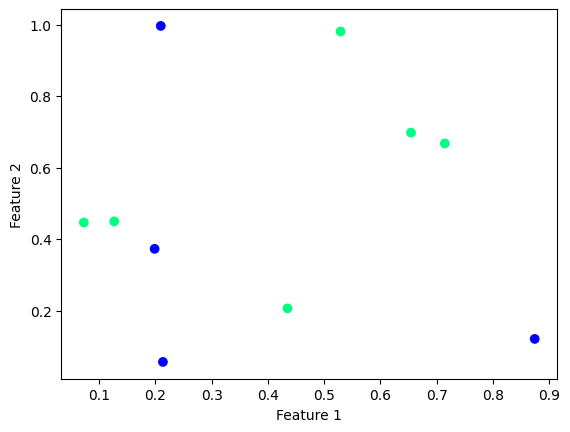

In [14]:
pr.scatterd(a[:, [1,2]])

# Exercise 10 

## a)

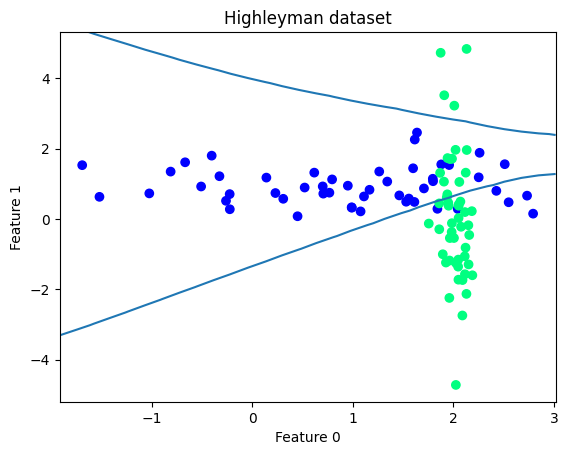

In [15]:
a = pr.gendath()
w = pr.parzenc(a)
pr.scatterd(a)
pr.plotc(w)

In [16]:
b = a*w
e = pr.testc(b)
e

0.17

# Exercise 13

In [17]:
a = np.random.randn(1000, 2)

## a)

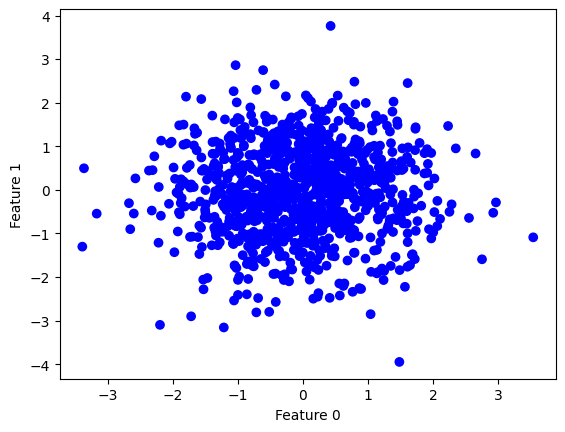

In [18]:
a = pr.prdataset(a)
pr.scatterd(a)

## b)

In [19]:
w = pr.gaussm(a)

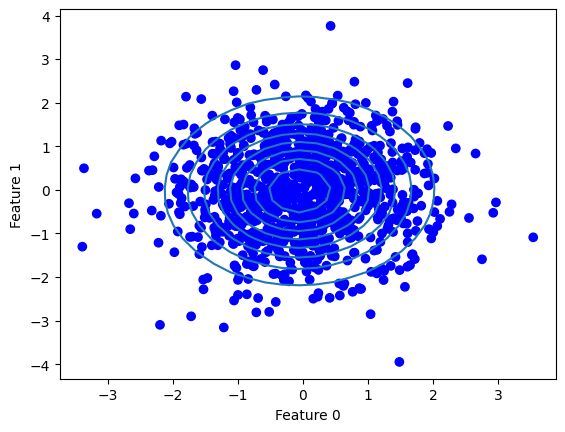

In [20]:
pr.scatterd(a)
pr.plotm(w)

# Exercise 15

## a) 
Linear

## b)

In [21]:
# Dataset
c1 = np.random.randn(10, 2)
c2 = 2 + np.random.randn(10, 2)
dataset = np.vstack((c1, c2))

# Classification
cl1 = np.ones((10, 1))
cl2 = 2*np.ones((10, 1))
classification = np.vstack((cl1, cl2))

# Prdataset
a = pr.prdataset(dataset, classification)

# Models
ldc = pr.ldc()
qdc = pr.qdc()

# Train
ldc.train(a)
qdc.train(a)

# eval
b_ldc = ldc.eval(a)
b_qdc = qdc.eval(a)

# Test
e_ldc = pr.testc(b_ldc) 
e_qdc = pr.testc(b_qdc)

print(e_ldc)
print(e_qdc)

0.05
0.0


In a way that doesn't depend on the optimal boundary. Typically the shape will be quadratic

## c)

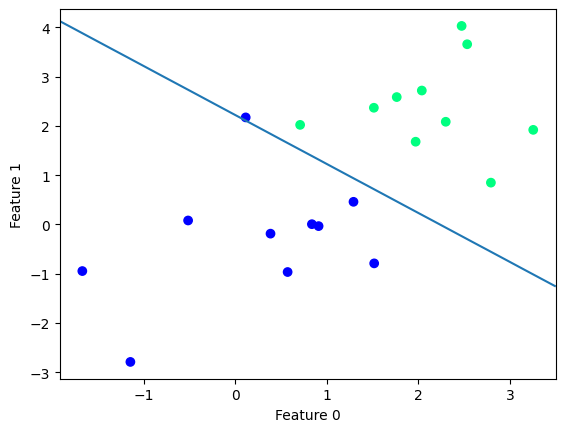

In [23]:
pr.scatterd(a)
pr.plotc(ldc)

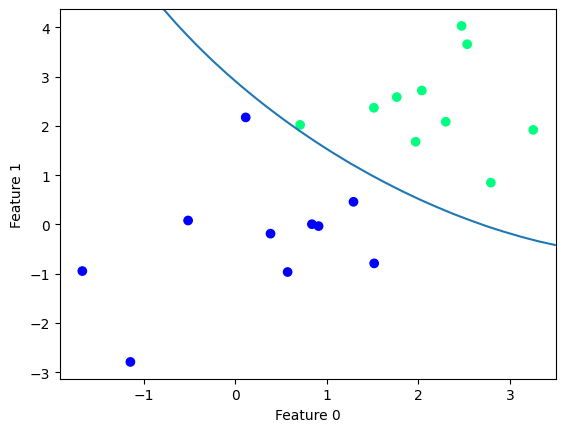

In [25]:
pr.scatterd(a)
pr.plotc(qdc)

ldc is by construction linear, qdc will tyically remain nonlinear due to the finite sample size.

## d)

The solution by ldc and qdc will coincide

# Exercies 16

Everything done on the previous exercise

## a)

ldc --> 1 point in wrong side <br>
qdc --> 0 point in wrong side

## b)

In [26]:
class_ldc = a*ldc*pr.labeld()
class_qdc = a*qdc*pr.labeld()

In [27]:
diff_ldc = np.count_nonzero(np.logical_not(np.equal(classification, class_ldc)))
diff_qdc = np.count_nonzero(np.logical_not(np.equal(classification, class_qdc)))

print("Diff ldc: " + str(diff_ldc))
print("Diff qdc: " +str(diff_qdc))

Diff ldc: 1
Diff qdc: 0


# Exercies 17

In [28]:
help(pr.gendats) 

Help on function gendats in module prtools.prtools:

gendats(n=(20, 20), dim=2, delta=2.0)
    Generation of a simple classification data.
    
        A = gendats(N,DIM,DELTA)
    
    Generate a two-class dataset A from two DIM-dimensional Gaussian
    distributions, containing N samples. Optionally, the mean of the
    first class can be shifted by an amount of DELTA.



## a)

In [38]:
# Dataset
a = pr.gendats([20,20],1,8);

## b)

In [39]:
# h for Parzen kernel
h = 0.5

## c)

In [31]:
a = pr.prdataset(+a)
w = pr.parzenm(a,h)

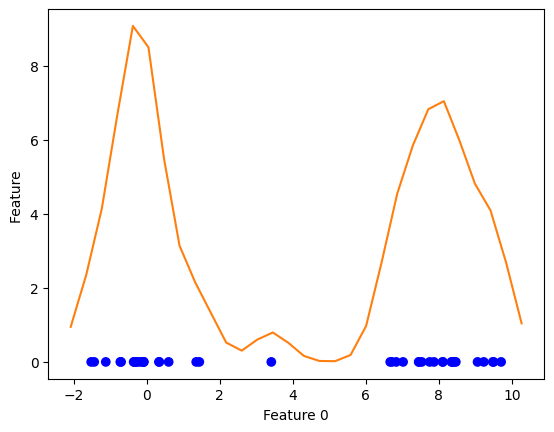

In [32]:
pr.scatterd(a); 
pr.plotm(w)

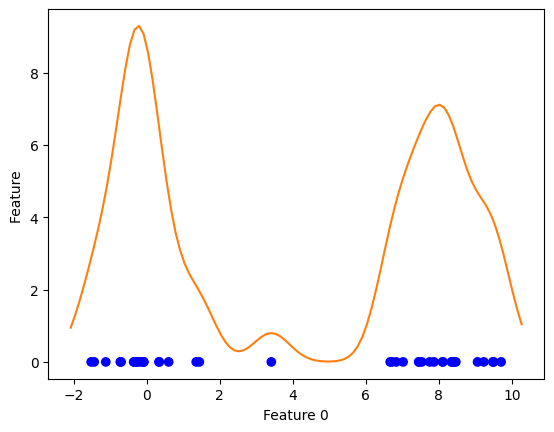

In [33]:
pr.scatterd(a);
pr.plotm(w,gridsize=100)

## d)

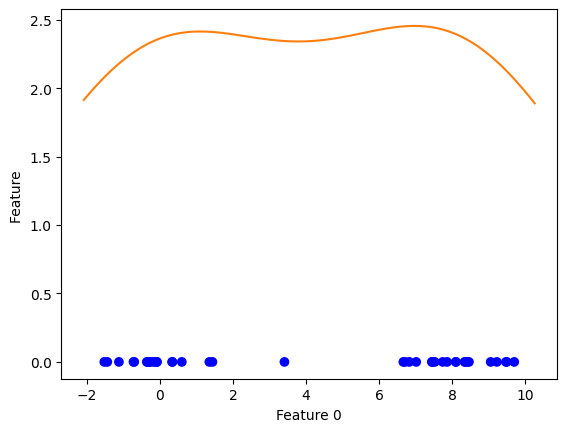

In [34]:
new_h = 3.5
a = pr.prdataset(+a)
w = pr.parzenm(a,new_h)
pr.scatterd(a);
pr.plotm(w,gridsize=100)

Too big

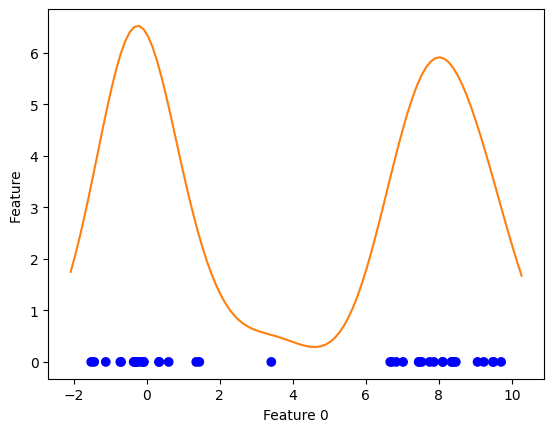

In [35]:
new_h = 0.9
a = pr.prdataset(+a)
w = pr.parzenm(a,new_h)
pr.scatterd(a);
pr.plotm(w,gridsize=100)

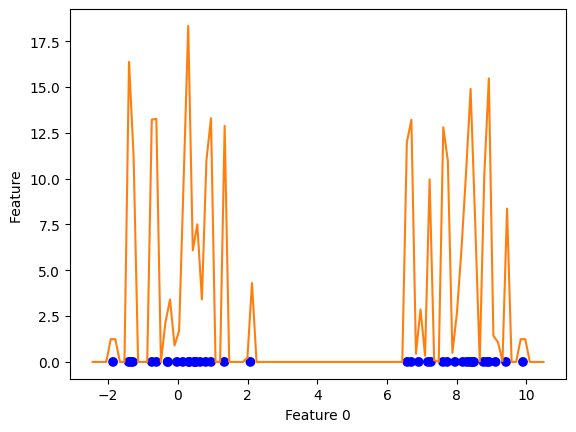

In [108]:
new_h = 0.03
a = pr.prdataset(+a)
w = pr.parzenm(a,new_h)
pr.scatterd(a);
pr.plotm(w,gridsize=100)

Too small

## Exercise 18

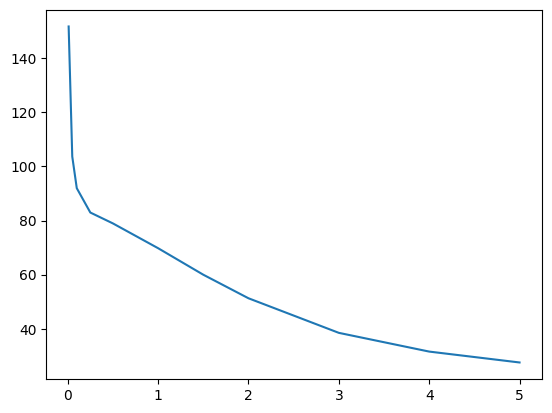

In [47]:
# Generate data
a = pr.gendats([20,20],1,8) 

# Data wihtout labels
a = pr.prdataset(+a)

# Different h's
hs = [0.01,0.05,0.1,0.25,0.5,1,1.5,2,3,4,5] 

# Estimate Parzen density & calculate log-likelihood for different h's
LL = np.zeros(len(hs))
for i in range(len(hs)): 
    w = pr.parzenm(a,hs[i]) 
    LL[i] = np.sum(np.log(+(a*w))); 

# Plot log-likelihood as function of h
plt.plot(hs,LL); 

The log-likelihood increases as h decreases. This is due to the fact that the log-ikelihood is computed on the training set, so probably it's not the best density estimate since is overfitting to the training set.

# Exercise 19

In [49]:
help(pr.gendat)

Help on function gendat in module prtools.dataset:

gendat(x, n, seed=None)



/tmp/ipykernel_5890/3886426111.py:19: RuntimeWarning: divide by zero encountered in log
  Ltst[i] = np.sum(np.log(+(tst*w)))


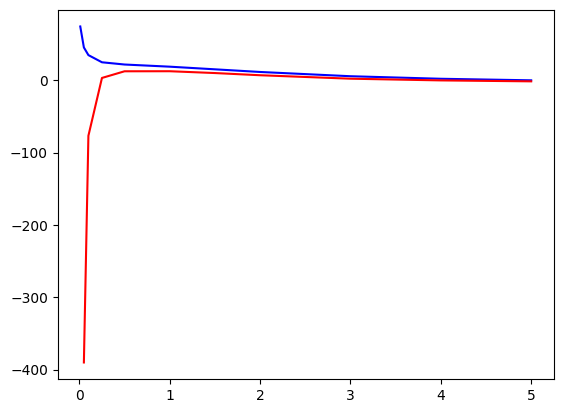

In [107]:
# Generate data
a = pr.gendats([20,20],1,8) 

# Data wihtout labels
a = pr.prdataset(+a)

# Split data 50/50
[trn,tst] = pr.gendat(a,0.5) 

# Different h's
hs = [0.01,0.05,0.1,0.25,0.5,1,1.5,2,3,4,5] 

# estimate Parzen density & calculate train and test log-likelihood
Ltrn = np.zeros(len(hs))
Ltst = np.zeros(len(hs))
for i in range(len(hs)): 
    w = pr.parzenm(trn,hs[i]) 
    Ltrn[i] = np.sum(np.log(+(trn*w))) 
    Ltst[i] = np.sum(np.log(+(tst*w))) 

# Plot train & test log-likelihood as function of h
plt.plot(hs,Ltrn,'b-') 
plt.plot(hs,Ltst,'r-') 

Clear maximum at h=1

# Exercise 20

In [63]:
help(pr.fisherc)

Help on function fisherc in module prtools.prtools:

fisherc(task=None, x=None, w=None)
    Fisher's Least Square Linear Discriminant
    
          W = fisherc(A)
    
    Finds the linear discriminant function between the classes in the 
    dataset A by minimizing the errors in the least square sense.



## a)

In [85]:
a = pr.gendatb(n = 100)

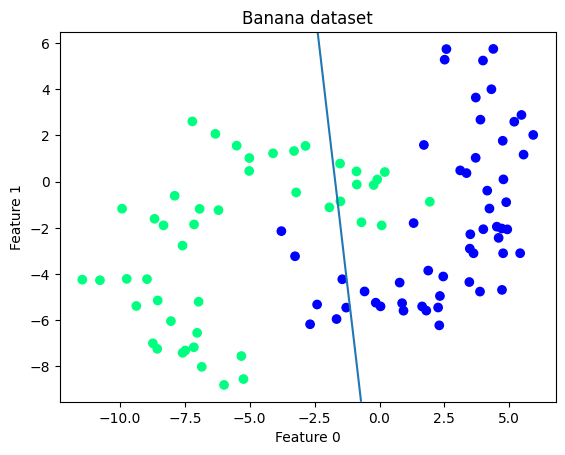

In [86]:
w = pr.nmc(a)
pr.scatterd(a)
pr.plotc(w)

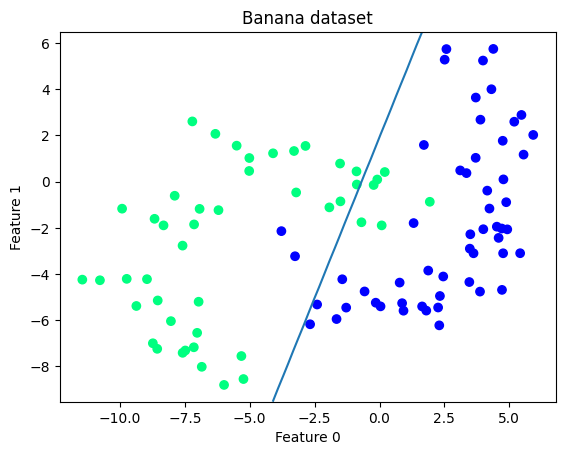

In [87]:
w = pr.ldc(a)
pr.scatterd(a)
pr.plotc(w)

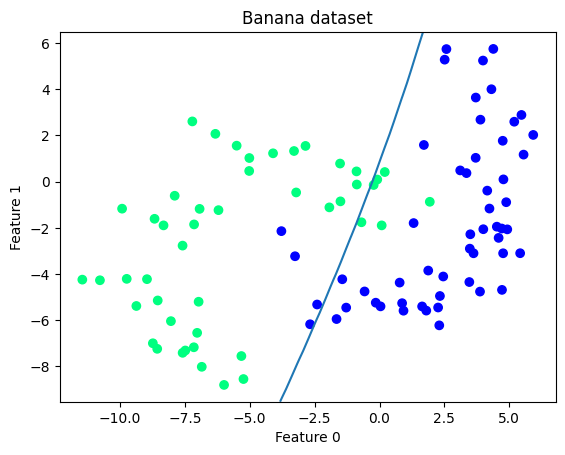

In [88]:
w = pr.qdc(a)
pr.scatterd(a)
pr.plotc(w)

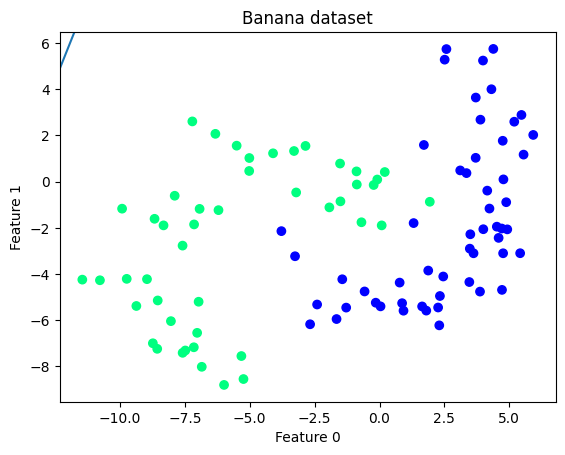

In [89]:
w = pr.fisherc(a)
pr.scatterd(a)
pr.plotc(w)

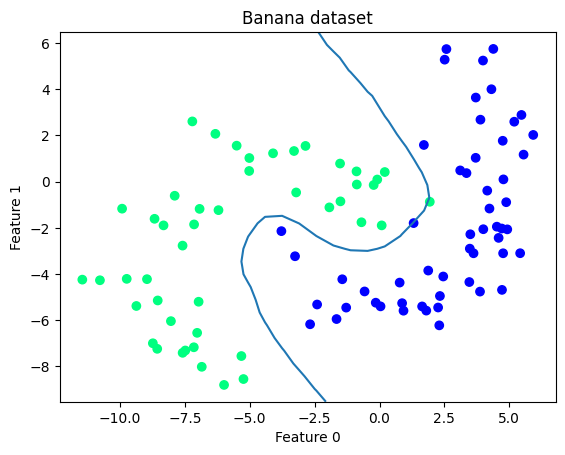

In [90]:
w = pr.parzenc(a, 1)
pr.scatterd(a)
pr.plotc(w)

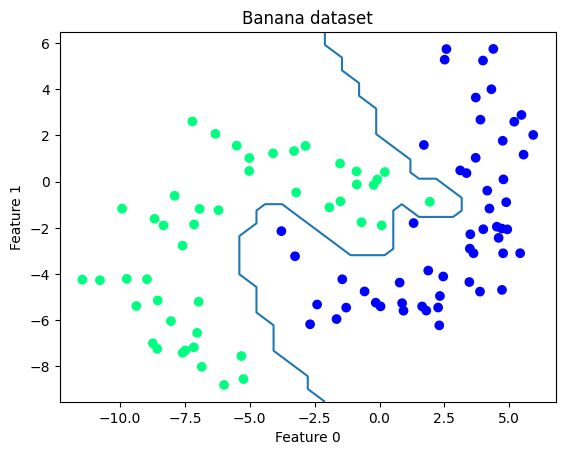

In [91]:
w = pr.knnc(a, 1)
pr.scatterd(a)
pr.plotc(w)

## b)

In [92]:
newtrain = a;
newtrain[:,[1]] *= 10.

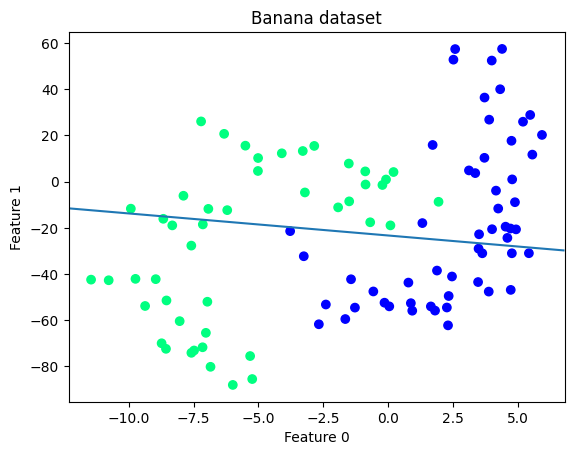

In [93]:
w = pr.nmc(newtrain)
pr.scatterd(newtrain)
pr.plotc(w)

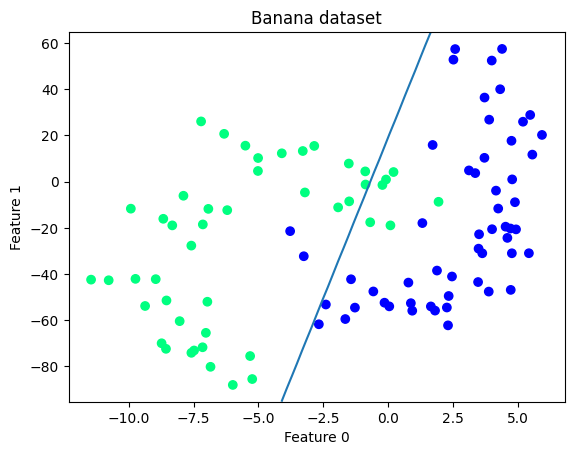

In [94]:
w = pr.ldc(newtrain)
pr.scatterd(newtrain)
pr.plotc(w)

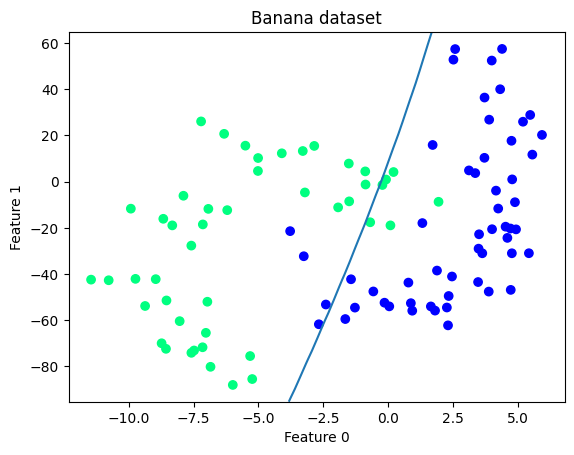

In [95]:
w = pr.qdc(newtrain)
pr.scatterd(newtrain)
pr.plotc(w)

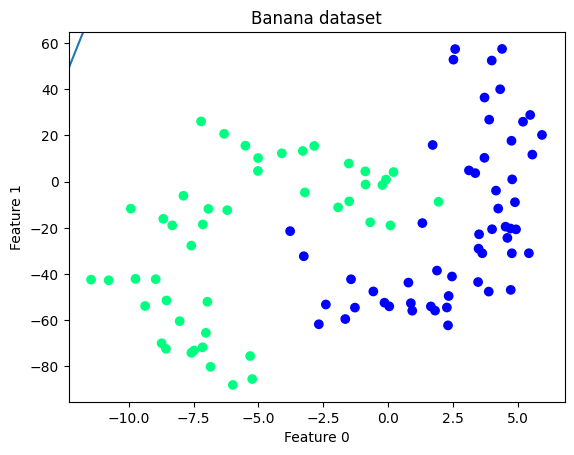

In [96]:
w = pr.fisherc(newtrain)
pr.scatterd(newtrain)
pr.plotc(w)

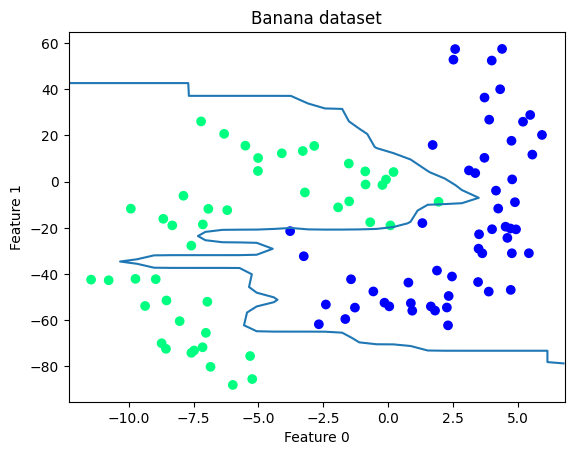

In [97]:
w = pr.parzenc(newtrain, 1)
pr.scatterd(newtrain)
pr.plotc(w)

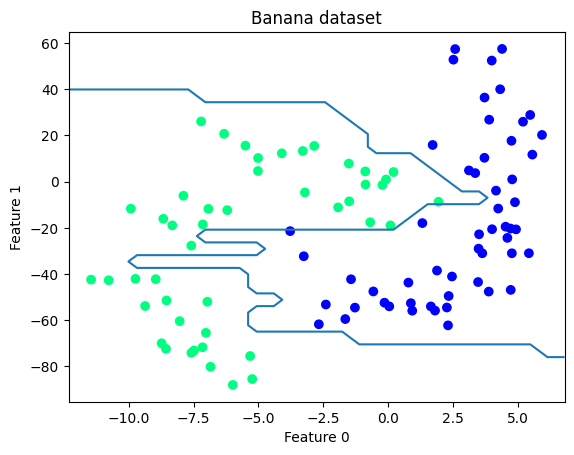

In [100]:
w = pr.knnc(newtrain, 1)
pr.scatterd(newtrain)
pr.plotc(w)

## c)

The quadratic, linear & fisher are not affected, the neares mean, the k-nn and de parzen are. It is because in the first classifiers a covariance matrix is estimated. Therefore, atuomatically the scale of the feature values is estimated in these classifiers.

## d)

In many cases it is an advantatge, because it means that you don't nees to optimize the scaling of the features. The disadvantatge is that the training set should be large enough to make the estimation of the scale. 

In [101]:
help(pr.parzenc)

Help on function parzenc in module prtools.prtools:

parzenc(task=None, x=None, w=None)
    Parzen Classifier
    
          W = parzenc(A,H)
    
    Computation of the Parzen classifier for the dataset A, using width
    parameter H. 
    Default: H=1.



In [102]:
help(pr.parzenm)

Help on function parzenm in module prtools.prtools:

parzenm(task=None, x=None, w=None)
    Parzen density estimate per class
    
          W = parzenm(A,H)
    
    On each of the classes in dataset A, a Parzen density is estimated,
    using a width parameter of H.
    Default H=1.

